In [1]:
# Warning
import warnings
warnings.filterwarnings("ignore")
import time as tm

# Library Utama
import pandas as pd
import numpy as np

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Library Visualisasi Blobs
from sklearn.datasets import make_blobs

# Library for Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### 1. Akuisisi Data

In [2]:
# Load dataset
x, y = make_blobs(n_samples=500, centers=4, cluster_std=0.5, random_state=0)

In [3]:
print(np.round(
    x[:5],5
))
print(type(x))

[[2.34453 1.07249]
 [3.20723 0.36766]
 [0.99915 4.2102 ]
 [0.39818 4.69439]
 [1.402   1.72673]]
<class 'numpy.ndarray'>


In [4]:
print(np.array(y))
print(type(y))

[1 1 0 0 1 2 2 0 0 3 2 1 2 3 0 0 1 0 3 0 0 1 2 3 0 3 1 2 3 2 2 2 1 2 2 1 3
 0 3 1 3 0 0 1 2 1 0 0 1 1 3 3 2 0 0 2 2 3 3 1 1 3 1 1 1 2 0 1 0 2 3 0 3 1
 3 1 2 2 0 0 3 0 3 0 0 2 3 3 1 3 3 3 1 3 0 0 1 1 1 0 3 3 1 3 0 0 2 1 0 3 3
 2 3 3 1 3 1 0 2 1 0 3 1 1 3 1 1 1 1 3 0 3 2 3 3 3 0 1 0 2 1 1 1 1 2 3 0 0
 2 3 3 1 0 0 0 2 2 1 2 0 1 0 1 1 2 2 1 0 3 2 1 3 1 2 0 3 0 3 3 3 1 1 1 0 2
 3 2 1 2 3 1 2 3 2 2 3 0 2 0 3 3 0 2 2 0 2 2 0 2 2 2 1 1 1 0 1 2 3 3 3 0 1
 2 3 2 1 3 0 3 2 2 2 2 2 0 0 0 2 3 1 1 2 2 1 3 3 0 1 0 0 0 2 1 3 0 3 3 2 3
 2 0 0 1 3 1 1 0 0 3 1 0 3 1 2 1 3 2 2 0 1 1 0 1 2 1 2 2 1 0 0 0 1 3 3 1 3
 3 3 0 1 1 3 0 3 1 1 2 3 3 0 3 0 1 0 3 2 3 2 2 0 0 0 2 2 3 1 0 2 3 1 0 0 1
 1 2 1 2 2 0 2 3 1 1 0 2 0 1 1 1 1 0 1 0 1 0 0 3 1 0 3 3 2 0 1 1 2 2 1 2 3
 0 0 0 3 0 2 0 3 3 0 3 3 2 3 3 2 2 2 2 3 3 3 3 1 3 1 0 1 3 0 1 0 1 0 2 2 3
 0 3 2 0 1 3 2 0 1 3 2 2 0 1 0 1 2 1 0 1 3 2 1 3 1 0 2 0 2 1 3 0 0 2 1 1 0
 0 2 0 2 3 1 2 1 3 2 2 2 3 2 0 3 2 2 2 2 2 0 3 1 2 1 0 1 2 3 0 3 2 3 0 3 0
 2 2 3 2 2 2 3 1 2 2 3 0 

In [5]:
# df1 = pd.DataFrame(x, columns=['X1', 'X2'])
# df2 = pd.DataFrame(y, columns=['Y'])
# combined_df = pd.concat([df1, df2], axis=1)
# combined_df


df = pd.concat([
    pd.DataFrame(x, columns=['X1', 'X2']),
    pd.DataFrame(y, columns=['Y'])
], axis=1)

print(df)

           X1        X2  Y
0    2.344528  1.072491  1
1    3.207226  0.367656  1
2    0.999149  4.210195  0
3    0.398179  4.694386  0
4    1.402004  1.726729  1
..        ...       ... ..
495  1.059607  4.621303  0
496  1.527953  1.307788  1
497 -1.928146  7.814760  3
498 -1.007698  9.215138  3
499  0.924661  4.509087  0

[500 rows x 3 columns]


In [6]:
# Cek dimensi dataset
print(x.shape, y.shape)

(500, 2) (500,)


### 2. Visualisasi Data

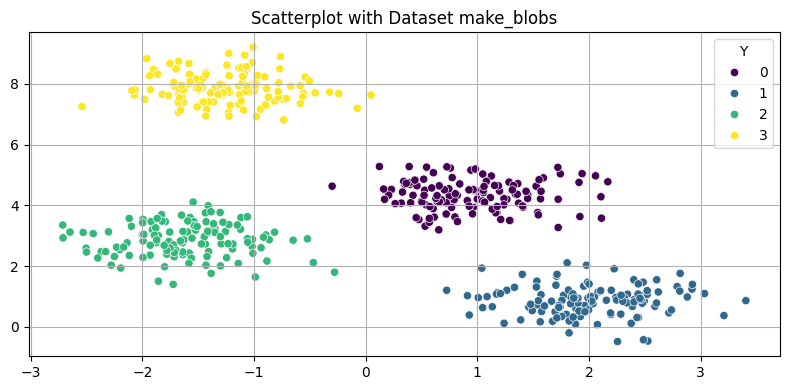

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette="viridis")

ax.set_title('Scatterplot with Dataset make_blobs')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

plt.tight_layout()
plt.show()

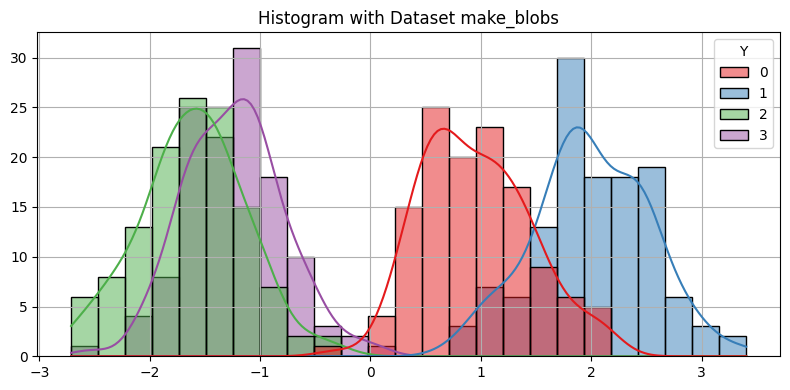

In [8]:
# plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x="X1", hue="Y", palette="Set1", kde=True, ax=ax, bins=25)

ax.set_title('Histogram with Dataset make_blobs')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

plt.tight_layout()
plt.show()

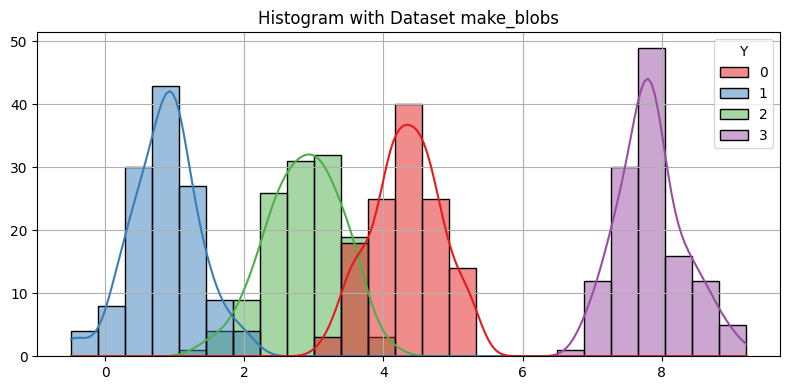

In [9]:
# plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x="X2", hue="Y", palette="Set1", kde=True, ax=ax, bins=25)

ax.set_title('Histogram with Dataset make_blobs')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

plt.tight_layout()
plt.show()

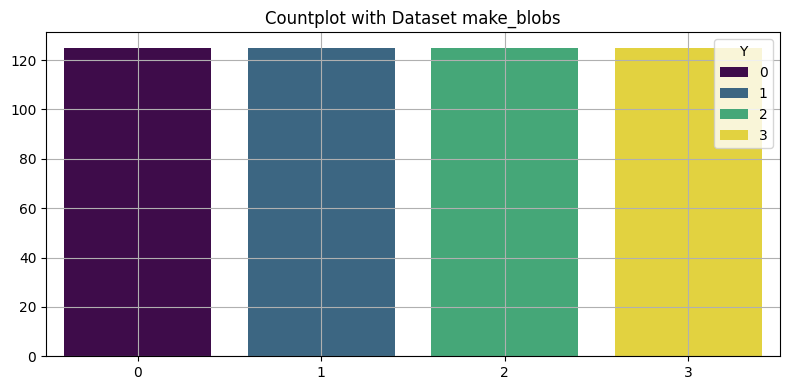

In [10]:
# plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x="Y", hue="Y", palette="viridis")

ax.set_title('Countplot with Dataset make_blobs')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

plt.tight_layout()
plt.show()

### 3. Praproses Data

In [11]:
# Menentukan range untuk jumlah klaster
range_n_clusters = range(1, 11)
inertia = []

# Menggunakan Metode Elbow unntuk menemukan jumlah klaster optimal
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

  File "c:\Users\lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\lenovo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lenovo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\lenovo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


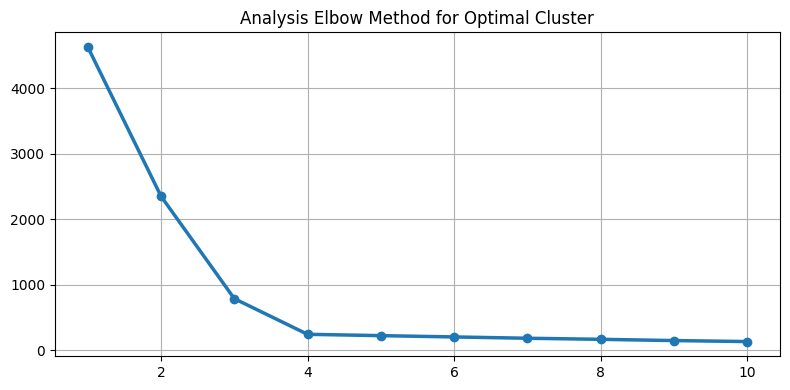

In [12]:
# Define Boxplot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range_n_clusters, inertia, color="tab:blue", linewidth=2.5, marker="o")

# Set Labels
ax.set_title('Analysis Elbow Method for Optimal Cluster')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# Show Boxplot
plt.tight_layout()
plt.show()

### 4. K-Means Algorithm

In [13]:
# Measuring Execution Time
start_time = tm.time()

In [14]:
# Menentukan jumlah klaster optimal dari hasil Elbow
optimal_clusters = 4
# Menerapkan KMeans dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

In [15]:
y_kmeans

array([2, 2, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       3, 1, 0, 1, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 1, 0, 1, 2, 1, 0, 0, 2,
       3, 2, 0, 0, 2, 2, 1, 1, 3, 0, 0, 3, 3, 1, 1, 2, 2, 1, 2, 2, 2, 3,
       0, 2, 0, 3, 1, 0, 1, 2, 1, 2, 3, 3, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1,
       2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 3, 2, 0, 1,
       1, 3, 1, 1, 2, 1, 2, 0, 3, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       3, 1, 1, 1, 0, 2, 0, 3, 2, 2, 2, 2, 3, 1, 0, 0, 3, 1, 1, 2, 0, 0,
       0, 3, 3, 2, 3, 0, 2, 0, 2, 2, 3, 3, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 3, 1, 3, 2, 3, 1, 2, 3, 1, 3, 3, 1, 0, 3,
       0, 1, 1, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 2, 2, 2, 0, 2, 3, 1, 1, 1,
       0, 2, 3, 1, 3, 2, 1, 0, 1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 1, 2, 2, 3,
       3, 2, 1, 1, 0, 2, 0, 0, 0, 3, 2, 1, 0, 1, 1, 3, 1, 3, 0, 0, 2, 1,
       2, 2, 0, 0, 1, 2, 0, 1, 2, 3, 2, 1, 3, 3, 0, 2, 2, 0, 2, 3, 2, 3,
       3, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2,

In [16]:
# Centroid KMeans
centers = kmeans.cluster_centers_
centers

array([[ 0.95326783,  4.32645977,  0.        ],
       [-1.23904157,  7.84892348,  3.        ],
       [ 2.00058775,  0.86199894,  1.        ],
       [-1.60779943,  2.85858832,  2.        ]])

In [17]:
# Measuring Execution Time
end_time = tm.time()

# Calculating the Total Execution Time
execution_time = end_time - start_time

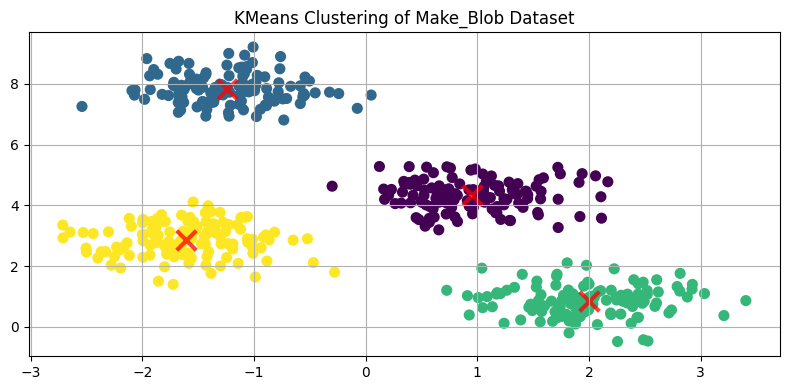

In [18]:
# Define Boxplot
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(df["X1"], df["X2"], c=y_kmeans, cmap='viridis', marker='o', linewidths=2.)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='x', linewidths=3.)

# Set Labels
ax.set_title('KMeans Clustering of Make_Blob Dataset')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# Show Boxplot
plt.tight_layout()
plt.show()

In [19]:
# Menghitung skor adjusted rand index (ARI)
ari_score_km = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index (ARI) : {ari_score_km:.4f}")

Adjusted Rand Index (ARI) : 1.0000


In [20]:
# Akurasi
# Mengakses Nilai SSE (inertia_)

sse = kmeans.inertia_
print(f"Nilai SSE (Inertia) : {sse:.2f}")

Nilai SSE (Inertia) : 239.71


In [21]:
# Lama eksekusi
print("Time : "+"{:,.2f}".format(execution_time))

Time : 0.05


### 5. DBSCAN Algorithm

In [22]:
# Measuring Execution Time
start_time2 = tm.time()

In [23]:
clustering = DBSCAN(eps=0.6, min_samples=2).fit_predict(df[["X1", "X2"]])
clustering

array([ 0,  0,  1,  1,  0,  2,  2,  1,  1,  3,  2,  0,  2,  3,  1,  1,  0,
        1,  3,  1,  1,  0,  2,  3,  1,  3,  0,  2,  3,  2,  2,  2,  0,  2,
        2,  0,  3,  1,  3,  0,  3,  1,  1,  0,  2,  0,  1,  1,  0,  0,  3,
        3,  2,  1,  1,  2,  2,  3,  3,  0,  0,  3,  0,  0,  0,  2,  1,  0,
        1,  2,  3,  1,  3,  0,  3,  0,  2,  2,  1,  1,  3,  1,  3,  1,  1,
        2,  3,  3,  0,  3,  3,  3,  0,  3,  1,  1,  0,  0,  0,  1,  3,  3,
        0,  3,  1,  1,  2,  0,  1,  3,  3,  2,  3,  3,  0,  3,  0,  1,  2,
        0,  1,  3,  0,  0,  3,  0,  0,  0,  0,  3,  1,  3,  2,  3,  3,  3,
        1,  0,  1,  2,  0,  0,  0,  0,  2,  3,  1,  1,  2,  3,  3,  0,  1,
        1,  1,  2,  2,  0,  2,  1,  0,  1,  0,  0,  2,  2,  0,  1,  3,  2,
        0,  3,  0,  2,  1,  3,  1,  3,  3,  3,  0,  0,  0,  1,  2,  3,  2,
        0,  2,  3,  0,  2,  3,  2,  2,  3,  1,  2,  1,  3,  3,  1,  2,  2,
        1,  2,  2,  1,  2,  2,  2,  0,  0,  0,  1,  0,  2,  3,  3,  3,  1,
        0,  2,  3,  2,  0

In [24]:
# Measuring Execution Time
end_time2 = tm.time()

# Calculating the Total Execution Time
execution_time2 = end_time2 - start_time2

In [25]:
# Menghitung skor adjusted rand index (ARI)
ari_score_db = adjusted_rand_score(y, clustering)
print(f"Adjusted Rand Index (ARI) : {ari_score_db:.4f}")

Adjusted Rand Index (ARI) : 0.9973


In [26]:
# Akurasi
# Mengakses Silhouette Score
sil_score = silhouette_score(x, clustering)
print(f"Adjusted Silhouette Score : {sil_score:.4f}")

Adjusted Silhouette Score : 0.6436


In [27]:
# Lama eksekusi
print("Time : "+"{:,.2f}".format(execution_time2))

Time : 0.02
